# Graph Convolution Network

A tutorial for exercising implement graph convolution network (GCN). <br>
We will implement the graph convolution to classify nodes in some network graph. <br>
It is almost similar to the implementation in T. Kipf's paper "Semi-supervised classification with graph convolutional networks". <br>
Refer T. Kipf's github - https://github.com/tkipf/gcn

In [1]:
import tensorflow as tf
from IPython.display import Image

/Users/Lulu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Assume that graph inputs - adjacency matrix and node features - are given, and number of nodes and features are 50. <br>
Therefore, the shape of node feature matrix is (batch_size, num_nodes, num_features) and adjacency matrix is (batch_size, num_nodes, num_nodes). <br> 
And the number of labels are 10.

In [2]:
num_nodes = 50
num_features = 50
num_labels = 10
X = tf.placeholder(tf.float64, shape=(None, num_nodes, num_features))
A = tf.placeholder(tf.float64, shape=(None, num_nodes, num_nodes))
Y_truth = tf.placeholder(tf.float64, shape=(None, num_labels))

The equation of graph convolution is as below. <br>
$$ H^{l+1} = \sigma(AH^{l}W^{l}) $$
We will implement this equation in function named graph_conv. The function will receive l-th node features,  adjacency matrix, and the output dimension of node features as inputs. 

Actually, original equation is introduced as above, which does not use bias term, in T.Kipf's paper. However, I think using bias is necessary, as below, because the bias term shifts the decision boundary. 
$$ H^{l+1} = \sigma(A(H^{l}W^{l}+b^{l})) $$
Therefore, I set 'use_bias=True' at a dense layer in the graph convolution.

In [3]:
def graph_conv(_X, _A, output_dim):
    output = tf.layers.dense(_X, units=output_dim, use_bias=True)
    output = tf.matmul(_A, output)
    output = tf.nn.relu(output)
    return output

In [4]:
X_new = graph_conv(X, A, 32)
X_new

<tf.Tensor 'Relu:0' shape=(?, 50, 32) dtype=float64>

After single graph convolution, we can check that the dimension of node features is transformed from 50 to 32. <br>
We want to build the graph convolution network with three graph convolution layers and softmax classifier, as below.

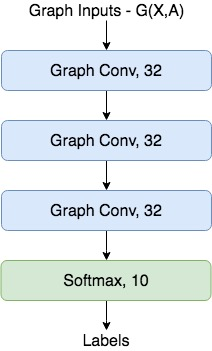

In [5]:
Image('./figures/graph_conv.jpg')

In [6]:
gconv1 = graph_conv(X, A, 32)
gconv2 = graph_conv(gconv1, A, 32)
gconv3 = graph_conv(gconv2, A, 32)
Y_pred = tf.nn.softmax(tf.layers.dense(gconv3, units=num_labels, use_bias=True), axis=2)
Y_pred

<tf.Tensor 'Reshape_1:0' shape=(?, 50, 10) dtype=float64>

A shape of the final output is [batch_size, num_nodes=50, num_labels=10]. <br>
Finally, we have to set the loss function as a cross entropy loss, because it is the classification task.

In [7]:
Y_pred = tf.reshape(Y_pred, [-1])
loss = tf.reduce_mean(Y_truth*tf.log(Y_pred+1.**-5))

Or you can use cross entropy loss variants already implemented in TensorFlow. <br>
As usually done in supervised learning, we have to minimize the loss function. <br> 
We do not have data to train in this tutorial, so we will skip the training. 